In [1]:
%matplotlib inline

/home/tkralidi/woudc-github-woudc/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import datetime
import matplotlib.pyplot as plt
from pywoudc import WoudcClient

# connect to WOUDC data service
client = WoudcClient()

# get Edmonton sonde data from 1980 to present
gaw_id = 'EDT'
begin = datetime.date(1980, 1, 1)
end = datetime.date.today()

data = client.get_data('ozonesonde',
                       property_name='gaw_id',
                       property_value=gaw_id,
                       temporal=[begin, end])

len(data['features'])

1546

In [3]:
type(data['features'])

list

In [4]:
data['features'][0]

{u'geometry': {u'coordinates': [-114.1, 53.55], u'type': u'Point'},
 u'properties': {u'agency': u'MSC',
  u'data_block': u'Pressure,O3PartialPressure,Temperature,WindSpeed,WindDirection,LevelCode,Duration,GPHeight,RelativeHumidity,SampleTemperature\r\n931,1.4,-19,11,340,,,,,\r\n870,1.5,-24,11,348,,,,,\r\n700,1.9,-19,8,155,,,,,\r\n500,2.0,-39,7,146,,,,,\r\n476,1.9,-42,10,166,,,,,\r\n369,3.6,-48,22,243,,,,,\r\n300,7.1,-49,29,251,,,,,\r\n262,7.8,-50,29,261,,,,,\r\n236,10.3,-49,27,266,,,,,\r\n220,9.0,-49,25,269,,,,,\r\n204,13.6,-50,23,271,,,,,\r\n200,14.1,-50,22,272,,,,,\r\n191,15.0,-50,23,273,,,,,\r\n178,11.2,-51,24,276,,,,,\r\n165,13.9,-52,25,278,,,,,\r\n151,19.4,-52,26,281,,,,,\r\n150,19.2,-52,26,281,,,,,\r\n143,17.4,-52,26,283,,,,,\r\n138,22.9,-51,26,284,,,,,\r\n133,22.6,-51,26,286,,,,,\r\n129,19.9,-51,26,287,,,,,\r\n122,19.7,-51,25,290,,,,,\r\n114,16.4,-52,25,293,,,,,\r\n100,20.0,-50,25,298,,,,,\r\n91,21.1,-50,24,298,,,,,\r\n80,20.1,-51,23,298,,,,,\r\n76,16.5,-51,22,298,,,,,\r\n74,17.

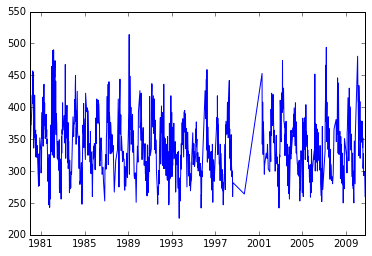

In [6]:
# setup graph axes
x_axis = [datetime.datetime.strptime(x['properties']['instance_datetime'], '%Y/%m/%d %H:%M:%S+00') for x in data['features'] if x['properties']['flight_summary_totalo3']]
y_axis = [x['properties']['flight_summary_totalo3'] for x in data['features'] if x['properties']['flight_summary_totalo3']]

# render simple plot
plt.plot(x_axis, y_axis)